### Model that accurately predicts wind turbine power output from wind speed values provided in the data set

***

Wind power forecasting plays a vital role in renewable energy production. Forecasting wind energy accuretly is a significant challenge due to the unpredictable and complex behavior of wind signals. The below wind power forecast claculates an estimate expected power production for one or more wind turbines.


https://lucdemortier.github.io/articles/17/WindPower

In [48]:
# import libraries
# Numerical arrays
import numpy as np
# Machine Learning - KMeans
import sklearn.cluster as skcl
# Import Pandas library to analyze the data
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# More Plotting
import seaborn as sns
# Machine Learning
import sklearn.linear_model as lm
# Results evaulation:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# to set the plot default size to be bigge
plt.rcParams['figure.figsize'] = (8, 6)


### Data import

In [49]:
# Import Dataset into Dataframe
ppdf = pd.read_csv("powerproduction.csv")
ppdf


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [50]:
# assign speed values to variable x
x = ppdf[['speed']]

In [51]:
# assign power values to variable y
y = ppdf['power']

In [52]:
# quick checks of dataset parameters
ppdf.describe()


,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### Data analysis and visualisation

### Using statsmodel

In [53]:
m.intercept_

NameError: name 'm' is not defined

In [54]:
m.coef_


NameError: name 'm' is not defined

In [55]:
m.score(x, y)

NameError: name 'm' is not defined

In [56]:
import statsmodels.api as sm

#Tell statsmodel to include an intercept
xwithc = sm.add_constant(x)

#Create a model

msm = sm.OLS(y, xwithc)
#Fit the data
rsm = msm.fit()
#Print a summary
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  power   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1339.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          2.86e-143
Time:                        00:40:25   Log-Likelihood:                -2246.8
No. Observations:                 500   AIC:                             4498.
Df Residuals:                     498   BIC:                             4506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.8999      1.950     -7.128      0.0

R-squared of power is equal to 0.729 and adjustable R-squared is equal to 0.728 which indicate that the linear regression predictions is not the strongest but it is a good start.   
Prob(F-Statistic) tells the overall significance of the regression. he null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful. Lets check it on the plot.

In [57]:
#plot style
plt.style.use('ggplot')
#plot size
plt.rcParams['figure.figsize'] = (14,10)

Text(0, 0.5, 'Power')

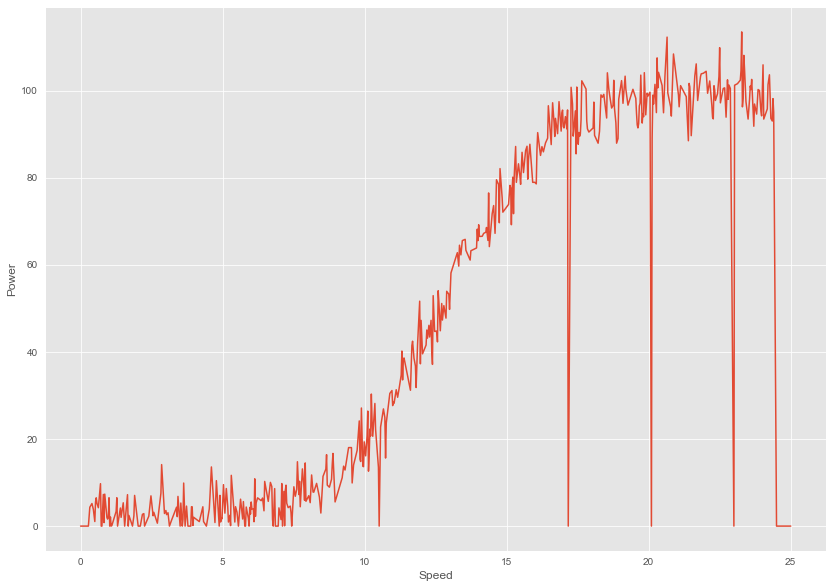

In [58]:
#Do regresssion on the x and y arrays using numpy
plt.plot(x,y,9)
plt.xlabel('Speed')
plt.ylabel('Power')

Observations from the data on the model:<br>
1. The data set consists of the following fields:<br>
ID - Measurement ID<br>
speed - Wind speed<br>
power - Turbine power output<br>
1. There seems to be a strong coorelation between the spped of the wind and the turbine power;<br>
2. Peaks in wind speed correspond to peaks in turbine power<br>
3. the effect of the cut-in speed is also visible (periods of zero turbine output associated with low, but non-zero wind speed).<br>
4. The distribution of the dots resemble the s shape line.<br>
5. There are visisble few outlier which suggest that at few points in time there was no turbine power output when wind speed was strong. This could reflect the turbine maintenance time. The outliers may be affecting the R square score and are not significant so lets remove them and reasses.

### Data cleansing
    

In [59]:
# remove instances where the power output is zero
newdf = ppdf[ppdf['power'] !=0]

In [60]:
# assign speed values to variable nx
nx = newdf[['speed']]

In [61]:
# assign power values to variable ny
ny = newdf[['power']]

In [62]:
newdf

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


Text(0, 0.5, 'Power')

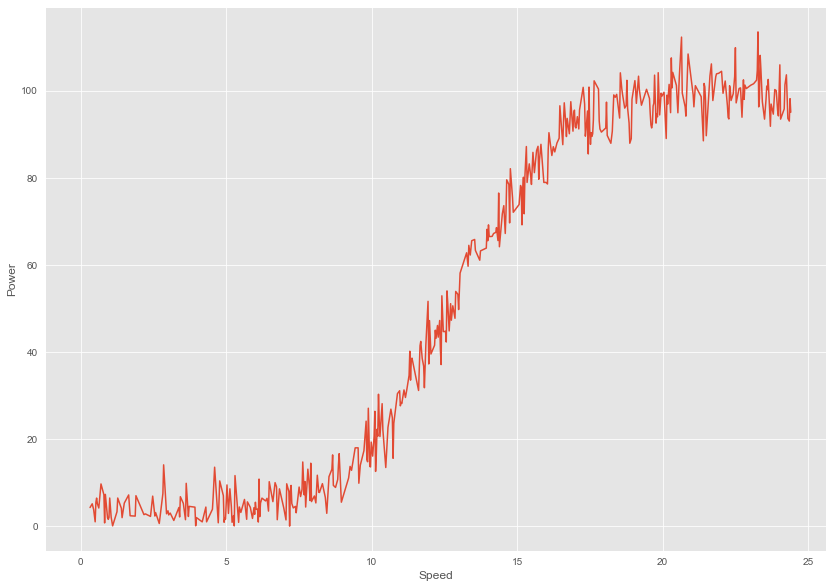

In [63]:
#Check if power output zero is removed from the regression
plt.plot(nx,ny,9)
plt.xlabel('Speed')
plt.ylabel('Power')


In [64]:
import statsmodels.api as sm

#Tell statsmodel to include an intercept
xwithc = sm.add_constant(nx)

#Create a model

msm = sm.OLS(ny, xwithc)
#Fit the data
rsm = msm.fit()
#Print a summary
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  power   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     3974.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          3.68e-225
Time:                        00:40:27   Log-Likelihood:                -1793.1
No. Observations:                 451   AIC:                             3590.
Df Residuals:                     449   BIC:                             3598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.8377      1.309    -15.153      0.0

Once the outliers have been removed I have rerun OLS Regression Result and the R-squared is at 0.898 which indicate strong enough correlation between the inscrease in the wind with the increase in the power and suggests that linear regression is worth checking. Let's check the linear function to visually asses its suitability.

### Model 

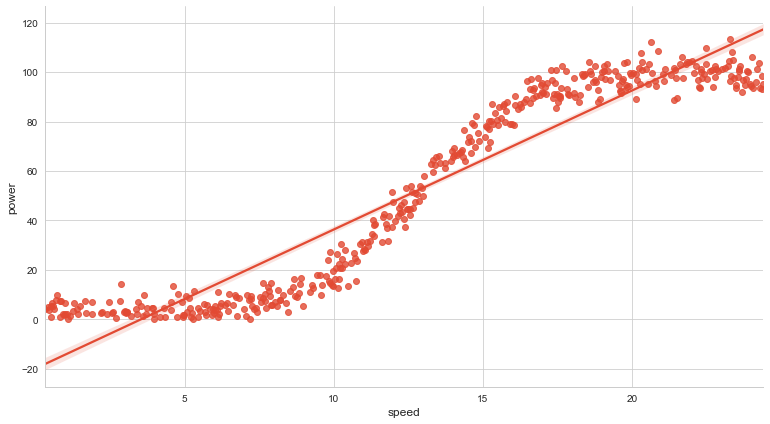

In [65]:
# visualize the dots with the straight line  
sns.set_style("whitegrid")

sns.lmplot(x="speed", y="power", data=newdf, height=6, aspect=1.8, fit_reg=True);

The distribution of the dots is not even and it resembles more a cubic than a straight line. It looks that at the top right most of the dots are above the line. In the bottem left corner most of the points are below the line. This suggest that the power output from the turbine is not a linear function of wind speed. 


Following the research online I have decided that 

In [67]:
# random_state (seed) is set for consistancy
nx_train, nx_test, ny_train, ny_test = train_test_split(nx, ny, test_size=0.3, random_state=0)


# convert the array shape and unify the lengths
nx_train = nx_train.values.reshape(-1,1)
ny_train = ny_train.values.reshape(-1,1)

# create an instance of a LinearRegression() model named lin_reg_model.
lin_reg_model = LinearRegression()

#Train/fit lin_reg_model on the training data.
lin_reg_model.fit(nx_train, ny_train)

LinearRegression()

Let's see the model parameters: the coefficient and intercept. The meaning of the model coefficient is that for each x-value increase by 1, the predicted response increases by coefficient. The intercept is the value where the regression line crosses the y-axis.

In [68]:
# coefficient of the model (slope)
print(f"The model coefficient (slope) is {float(lin_reg_model.coef_):.2f}")

# intercept value
print(f"Intercept: {float(lin_reg_model.intercept_):.1f}")

The model coefficient (slope) is 5.78
Intercept: -21.7


In [69]:

# reschape X_test
nx_test = nx_test.values.reshape(-1,1)

predictions = lin_reg_model.predict(nx_test)

(-20.0, 120.0)

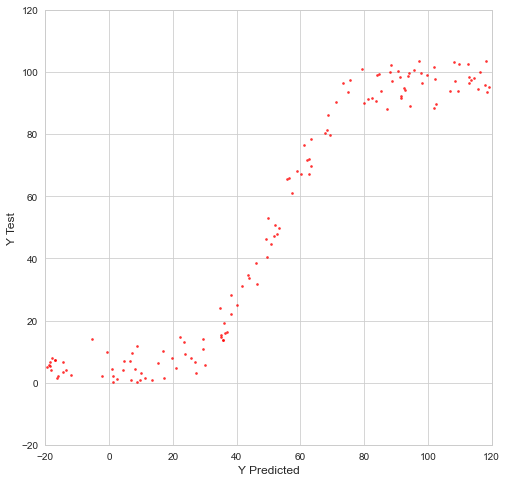

In [72]:
# plot the results
plt.scatter(predictions, ny_test, s=4, color='red', alpha=.8)
plt.xlabel('Y Predicted')
plt.ylabel('Y Test')
plt.rcParams["figure.figsize"] = (8,8)
plt.xlim(-20,120)
plt.ylim(-20,120)

In [78]:
# take a random wind speed value from the provided data set (cleaned)
wind_test = newdf["speed"].sample()

# link corresponding actual power output
for i in range(newdf.shape[0]):
    if newdf.iloc[i]["speed"] == wind_test.iloc[0]:
        actual_output = newdf.iloc[i]["power"]
        
power_predict = lin_reg_model.predict([wind_test])
print(f"The predicted power output for wind speed {float(wind_test):.3f} is: \t {float(power_predict):.3f}")
print(f"The actual power output for wind speed {float(wind_test):.3f} is: \t {float(actual_output):.3f}")
print(f"The prediction accuracy for the data point is: \t\t {float(abs(1.-(abs(power_predict-actual_output)/actual_output))*100):.1f}%")

KeyError: 0

In [77]:

# accuracy of the test set
predictions = predictions.flatten()

print(f"Root mean square error (RMSE): {mean_squared_error(ny_test, predictions, squared=False):.3f} \t(by hand: {sqrt((1./len(y_test))*(sum((y_test-predictions)**2))):.3f})")
print(f"Coefficient of determination (R square): {r2_score(ny_test, predictions):.2f}") # true value, predicted value

NameError: name 'sqrt' is not defined

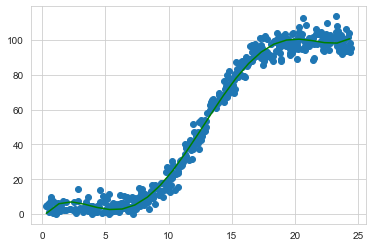

In [52]:
# creating curve fit 
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(nx, a, b, c, d, e, f):
	return (a * nx) + (b * nx**2) + (c * nx**3) + (d * nx**4) + (e * nx**5) + f
 

# choose the input and output variables
nx, ny = newdf['speed'], newdf['power']
# curve fit
popt, _ = curve_fit(objective, nx, ny)
# summarize the parameter values
a, b, c, d, e, f = popt
# plot input vs output
pyplot.scatter(nx, ny)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(nx), max(nx), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '-', color='green')
pyplot.show()
# code adopted from https://machinelearningmastery.com/curve-fitting-with-python/

### Linear Model Prediction

In [50]:
# Cleansed data Linear Model Prediction
# code adopted from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
nx = newdf["speed"].to_numpy()
ny = newdf["power"].to_numpy()

nx = nx.reshape(-1, 1)

model = LinearRegression().fit(nx,ny)
c_r = model.score(nx, ny)
c_p = [model.intercept_, model.coef_[0]]
c_r


0.8984832870534454

In [51]:
c_p

[-19.837685452108396, 5.618827837778542]

In [59]:
def zero_linear_model(nx, c_p):
    return c_p[0] + nx * c_p[1]

In [60]:
def zero_linear_predict(nx):
    return zero_linear_model(nx, c_p)

In [87]:
zero_linear_predict(21.0)


98.15769914124098

In [47]:
#polynomial regression
x=ppdf[['speed']]
y=ppdf['power']
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)


LinearRegression()

In [88]:
sns.set_style("whitegrid")

# Dataframe to house Data & Predictions
comparison = newdf
comparison['type'] = 'Data'

# Counter for While Loop
counter = 7

# Make 7 Predictions Using Non-Clean Data Trained Model
while counter < 26:
    d = {'speed':[counter], 'power':[nc_linear_predict(counter)], 'type':['Non-Clean']}
    comparison = comparison.append(pd.ppdf(data=d))
    counter += 5

# Reset Counter
counter = 5

# Make 5 Predictions Using Cleaned Data Trained Model
while counter < 26:
    d = {'speed':[counter], 'power':[c_linear_predict(counter)], 'type':['Clean']}
    comparison = comparison.append(pd.newdf(data=d))
    counter += 5
    
# Plot all data together
sns.lmplot(x="speed", y="power", data=comparison, hue="type", height=7.5, aspect=1.7, fit_reg=False);


<ipython-input-88-5e4e7c80f187>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison['type'] = 'Data'


NameError: name 'nc_linear_predict' is not defined

In [83]:
# check what 
m.fit(x,y)

LinearRegression()

#### References


Forecasting Wind Power; https://lucdemortier.github.io/articles/17/WindPower
    

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Statistics: How Should I interpret results of OLS?; jYOTI yADAV, https://medium.com/@jyotiyadav99111/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01

Using Pandas and Python to Explore Your Dataset; https://realpython.com/pandas-python-explore-dataset/
   

[1] Cheat Sheet: The pandas DataFrame Object https://www.webpages.uidaho.edu/~stevel/504/pandas%20dataframe%20notes.pdf

Don’t force your regression through zero just because you know the true intercept has to be zero; https://dynamicecology.wordpress.com/2017/04/13/dont-force-your-regression-through-zero-just-because-you-know-the-true-intercept-has-to-be-zero/

Wikipedia, Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis